In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [109]:
xlf = "who-confirmed-cases.xlsx"

In [110]:
df = pd.read_excel(xlf,)
wf = df[~df['Country'].str.contains('China -',regex=False)]

In [111]:
wf

,Date,WHO_ReportNumber,Country,WHO_Confirmed,Deaths
4,2020-01-20,1,Japan,1,0
5,2020-01-20,1,Republic of Korea,1,0
6,2020-01-20,1,Thailand,2,0
7,2020-01-20,1,China,278,3
22,2020-01-22,2,Japan,1,0
...,...,...,...,...,...
143,2020-01-29,9,United States of America,5,0
144,2020-01-29,9,Canada,3,0
145,2020-01-29,9,France,4,0
146,2020-01-29,9,Germany,4,0


In [112]:
### Some steps to sanitize the data, clean up typo's
### Filter out the Province data
country = df.Country[~df['Country'].str.contains('China -',regex=False)].unique()
print("No of Countries should match the summary + China\nNo Countries {}\nCountries :\n{}".format(len(country),np.sort(country)))

No of Countries should match the summary + China
No Countries 16
Countries :
['Australia' 'Cambodia' 'Canada' 'China' 'France' 'Germany' 'Japan'
 'Malaysia' 'Nepal' 'Republic of Korea' 'Singapore' 'Sri Lanka' 'Thailand'
 'United Arab Emirates' 'United States of America' 'Viet Nam']


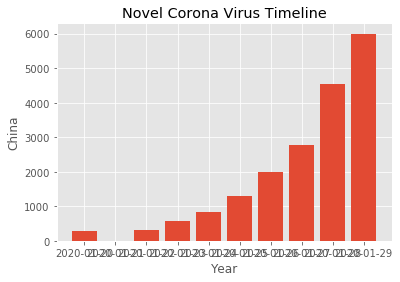

In [115]:
### Plot the China Data
x = wf.Date[wf.Country == 'China']
y = wf.WHO_Confirmed[wf.Country == 'China']
plt.bar(x, y, align='center')
plt.title('Novel Corona Virus Timeline')
plt.ylabel('China')
plt.xlabel('Year')

 
plt.show()